# Introduction
### Physical activity recognition plays an important role in modern health, fitness, and wearable technology. Machine learning models allow us to classify human movements using only sensor measurements from smartphones.
### My research question is: Can I accurately identify human activities such as walking, running, standing, and sitting by using only smartphone accelerometer and gyroscope data?
### Spoiler: The Random Forest model performed very well and PCA showed clear patterns in the activity data.
### In this project, I introduced the dataset, describe how I prepared the data, visualize patterns using PCA, compare a decision tree and a random forest model, and end with a summary of what worked well and what the findings can be used for in the future.

# Data Source Information
### I used the UCI Human Activity Recognition (HAR) dataset.
### It contains smartphone motion data collected from 30 people performing six activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying.
### The phone was kept in the participant’s pockets. The dataset provides many numerical features describing the motion during each activity.
### My goal was to build a model that predicts the activity being performed based only on these motion features.

# Data Cleaning
### The dataset provided separate text files for the features and labels. I loaded the files into Python, combined them into dataframes, and assigned feature names based on the dataset's description.  
### I also verified the training and testing sets and confirmed that no values were missing.


In [2]:
!pip install pandas numpy scikit-learn matplotlib shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.0 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 46.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 52.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 56.3 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 50.5 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 49.4 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20/20 [shap]2m19/20 [shap]otlib]n]


In [3]:
import pandas as pd

# Load feature names as a csv
features = pd.read_csv(
    "UCI HAR Dataset/features.txt",
    sep=r"\s+", # treats spaces as the separators between columns.
    header=None,
    names=["index", "feature"]
)

# Creates a list out of the feature names
feature_names = features["feature"].tolist()

# Fixes duplicate names
for i in range(len(feature_names)):
    feature_names[i] = f"{feature_names[i]}_{i}"

In [4]:
X_train = pd.read_csv(
    "UCI HAR Dataset/train/X_train.txt",
    sep=r"\s+",
    header=None,
    names=feature_names
)

X_train.to_csv("X_train.csv", index=False)

In [5]:
y_train = pd.read_csv(
    "UCI HAR Dataset/train/y_train.txt",
    header=None,
    names=["Activity"]
)

y_train.to_csv("y_train.csv", index=False)

In [6]:
X_test = pd.read_csv(
    "UCI HAR Dataset/test/X_test.txt",
    sep=r"\s+",
    header=None,
    names=feature_names
)

X_test.to_csv("X_test.csv", index=False)

In [7]:
y_test = pd.read_csv(
    "UCI HAR Dataset/test/y_test.txt",
    header=None,
    names=["Activity"]
)

y_test.to_csv("y_test.csv", index=False)

In [8]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

# Feature Selection
### The dataset includes many numerical features based on smartphone motion sensors so PCA gives a visual idea of how the data is structured.

### I used PCA to reduce the data to two components to make a scatter plot. This let me see if the different activities show any patterns in a simpler form.

In [9]:
!pip install matplotlib

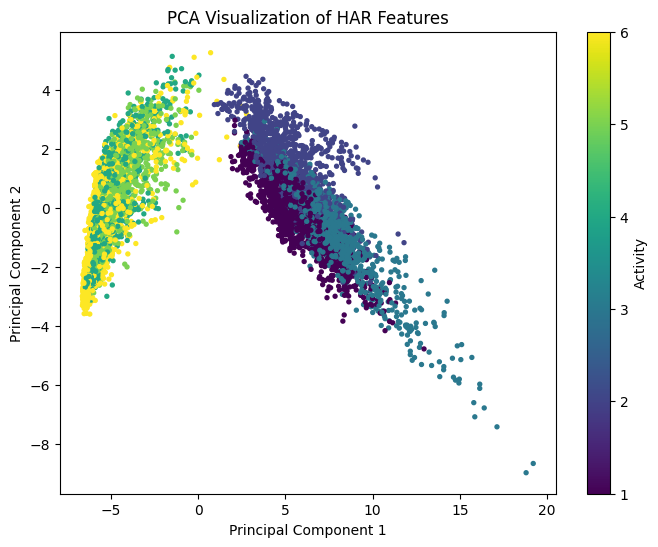

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Takes the first 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Makes a scatter plot colored by activity
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], 
                      c=y_train["Activity"], cmap="viridis", s=8)
plt.title("PCA Visualization of HAR Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Activity")
plt.show()

### PCA shows that the activities can be meaningfully separated. Some activities form clear groups and others overlap. This shows that the motion sensor data contains meaningful patterns that a model can learn.

# Model Selection and Tuning

### I started with a decision tree as a base model. Decision trees are easy to interpret but tend to overfit with many features. After evaluating this I trained a random forest model because it usually performs better by reducing overfitting. Comparing these two models helped demonstrate the improvement gained by using an ensemble method.

In [56]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.values.ravel())

# Predictions
dt_preds = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)



# Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Predictions
rf_preds = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)


#Results
dt_accuracy, rf_accuracy

(0.8622327790973872, 0.9256871394638616)

### The decision tree had lower accuracy than the random forest. This was expected because a single tree usually overfits especially with a high dimensional dataset.

### The Random Forest performed much better because it averages many trees which reduces variance. This comparison showed that an ensemble method is a better fit for this problem.

<Figure size 800x600 with 0 Axes>

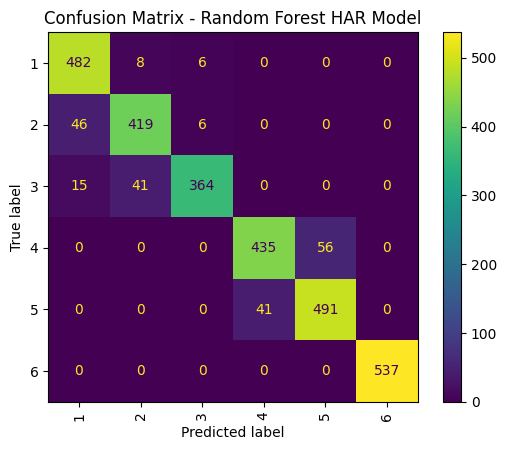

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, xticks_rotation='vertical')
plt.title("Confusion Matrix - Random Forest HAR Model")
plt.show()

# Explainability Analysis

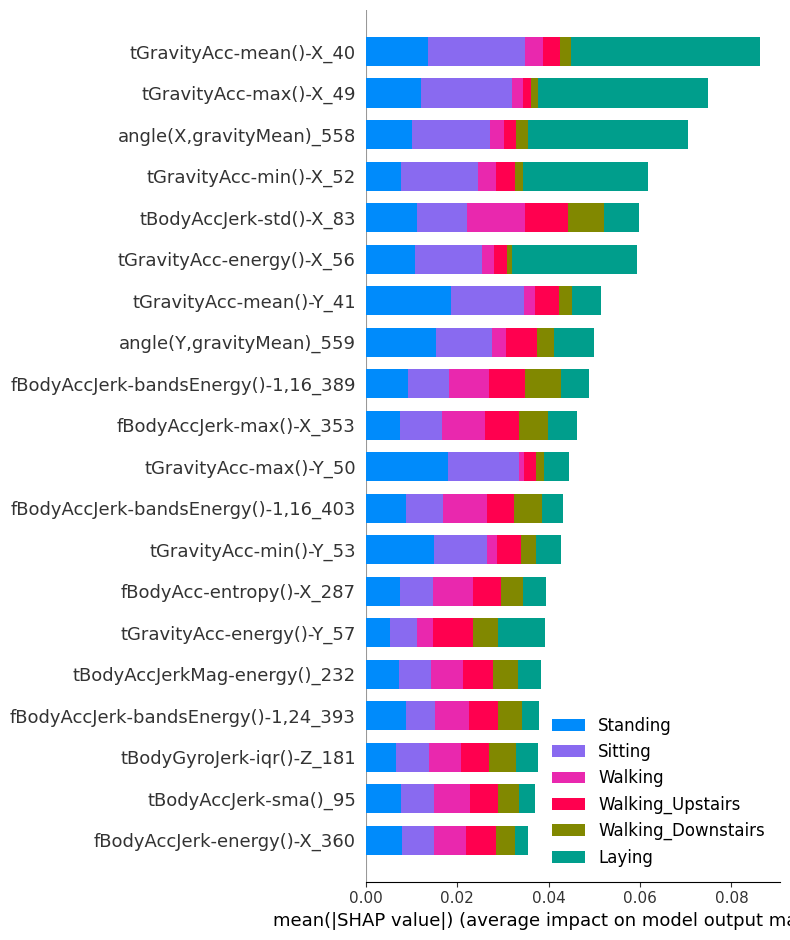

In [58]:
shap.summary_plot(
    shap_values.values,
    feature_names=X_train.columns,
    plot_type="bar",
    max_display=20,
    class_names=["Walking", "Walking_Upstairs", "Walking_Downstairs",
                 "Sitting", "Standing", "Laying"]
)

## Bar Plot Explanation
### This SHAP bar plot shows the top 20 features the model relies on most across all activity classes. Longer bars mean a feature has a stronger overall impact on predictions. The colors inside each bar show how much that feature contributes to each specific activity (ex: Walking, Sitting, Laying,).

### The plot highlights which movement and acceleration signals the model consistently uses to distinguish between activities.

In [59]:
print("expected_value shape:", np.array(explainer.expected_value).shape)
print("shap_values.values shape:", shap_values.values.shape)

expected_value shape: (6,)
shap_values.values shape: (2947, 561, 6)


In [60]:
import shap

sample_idx = 0
class_idx = 0

shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values.values[sample_idx, :, class_idx],
    X_test.iloc[sample_idx],
    feature_names=X_train.columns
)

## Force Plot Explanation

### The SHAP force plot shows how individual features push a single test sample toward or away from predicting Class 0 (walking). The center “baseline” is the model’s average output for Class 0. Each feature either increases the prediction (red) or decreases it (blue). Longer arrows represent stronger influence.

### For this sample several motion-related features (ex: tBodyAccJerk-std()-X_83) strongly pull the prediction downward, indicating that the sample does not match the patterns the model associates with Class 0.

### The plot was generated using SHAP’s force_plot() by passing the baseline, the SHAP values for this sample and class, and the sample’s feature values. It is difficult to read this visual so I exported it as "force_plot.html" which can be downloaded and opened in a web browser for better readability.

In [61]:
shap.save_html("force_plot.html", plot)

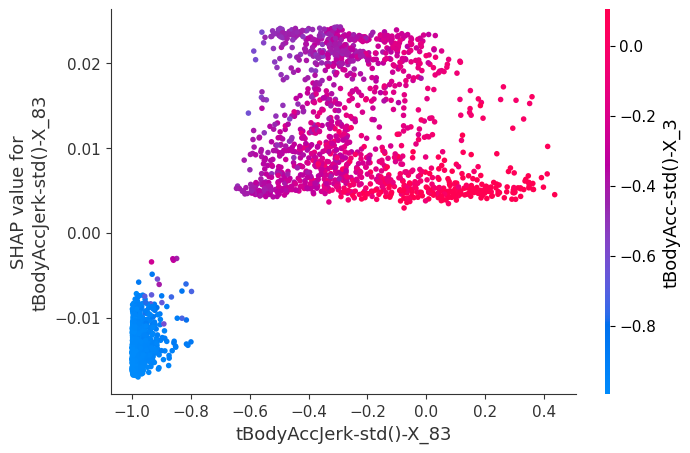

In [62]:
shap.dependence_plot(
    top_feature,
    shap_values.values[:, :, class_idx],
    X_test,
    feature_names=X_train.columns
)

## Dependence Plot Explanation
### This SHAP dependence plot shows how the feature tBodyAccJerk-std()-X (the variability of body acceleration jerk along the X-axis) affects the model’s prediction for Class 0 (Walking). The x-axis is the feature value and the y-axis is the SHAP value. This indicates how much tBodyAccJerk-std()-X pushes the prediction toward or away from Class 0. Each point is one observation.

### The color gradient (blue to red) represents the value of a second interacting feature. This shows how combinations of motion measurements influence the model. In short, the plot highlights that changes in jerkiness along the X-axis are a major driver of the model’s decision for "Walking".

# Discussion and Conclusion
### The Random Forest model performed well on the HAR dataset and confirmed that smartphone sensor features provide strong signals for distinguishing human activities.

### PCA showed that some activities form clear clusters while others overlap. This aligns with the model’s strengths and limitations.

### The SHAP analysis further clarified why the model works by highlighting which motion-based features (ex: jerk, gravity acceleration, energy measures) contribute most to different activity predictions.

### Machine learning applied to motion data has many practical uses beyond basic activity recognition. Similar models could help prosthetics respond more naturally, detect falls in elderly individuals, analyze athletic movement in real time, or teach robots more human-like motion patterns.

### Overall, the project showed that both predictive performance and interpretability matter. The SHAP results improve trust and understanding of its decisions by providing insight into how the model uses physical movement signals.